In [2]:
! pip install plotly
! pip install folium

In [17]:
# for data 
import pandas as pd
# for scientific computation
import numpy as np

In [45]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [19]:
import folium

In [20]:
df = pd.read_csv("C:/Users/Bruger/Desktop/python/mp3/house-data.csv", sep = ',')

In [21]:
df.shape

(21613, 21)

In [22]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
396,7375300160,20150309T000000,530000.0,5,2.25,2720,8800,1.0,0,0,...,7,1500,1220,1958,0,98008,47.5976,-122.118,2110,8800
7326,100100050,20141112T000000,275000.0,3,1.00,1320,11090,1.0,0,0,...,7,1320,0,1955,0,98155,47.7748,-122.304,1320,8319
9152,2324039100,20141112T000000,525000.0,4,2.75,2440,5080,2.0,0,0,...,8,1750,690,1960,0,98126,47.5547,-122.379,1920,6375
6105,1775500050,20150129T000000,440000.0,1,1.00,1160,64469,1.0,0,0,...,7,1160,0,2009,0,98072,47.7433,-122.082,1580,48352
22,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
169,1755700060,20140611T000000,371500.0,3,2.00,1370,8336,1.0,0,0,...,7,1370,0,1964,0,98133,47.7458,-122.331,1770,7288
2412,11520640,20140801T000000,810000.0,4,2.75,3010,10450,2.0,0,0,...,9,3010,0,1996,0,98052,47.6979,-122.112,3010,10530
10844,1454600116,20140611T000000,740000.0,4,2.75,2490,17833,2.0,0,2,...,9,1490,1000,1979,0,98125,47.7206,-122.284,2640,16943
6186,6705850020,20150401T000000,740000.0,4,2.50,3030,8335,2.0,0,0,...,10,3030,0,1992,0,98075,47.5780,-122.056,2850,8678
9094,1223089081,20140530T000000,425000.0,3,1.75,1510,44000,1.0,0,0,...,7,1240,270,1989,0,98045,47.4851,-121.716,2290,36242


In [23]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 1000x600 with 0 Axes>

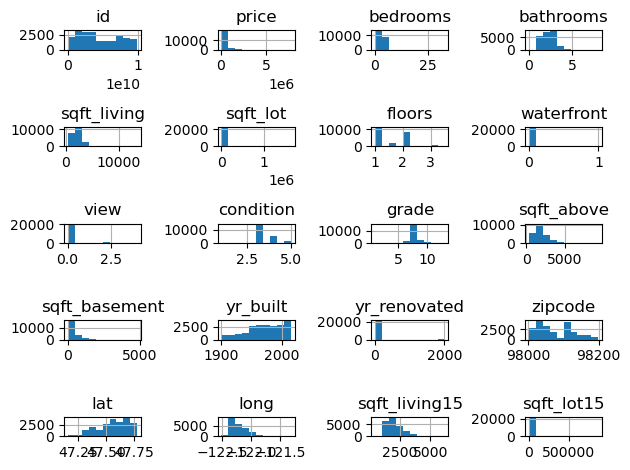

In [26]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
correlations = numeric_df.corr()['price'].drop('price')

# Find attribute with the lowest correlation
attribute_to_remove = correlations.idxmin()

# Remove attribute with the lowest correlation
df.drop(columns=attribute_to_remove, inplace=True)


print("The attribute '{}' wich has the lowest correlation to house price has been removed.".format(attribute_to_remove))

The attribute 'zipcode' wich has the lowest correlation to house price has been removed.


<Figure size 1000x600 with 0 Axes>

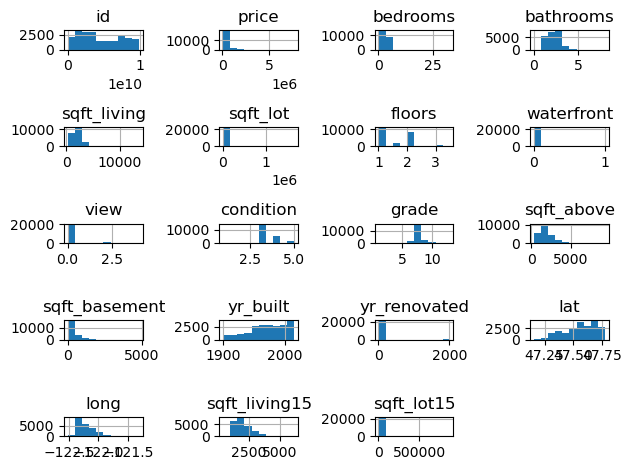

In [29]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

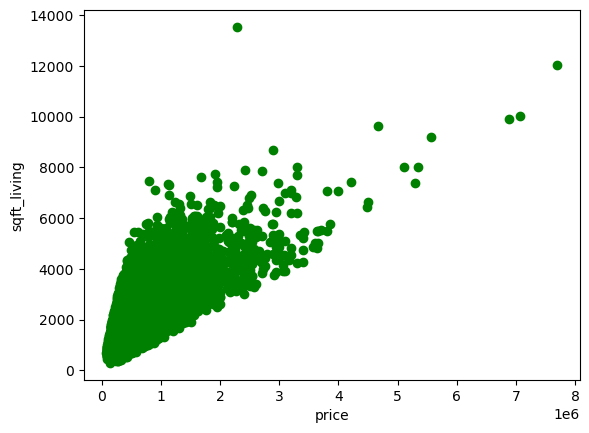

In [35]:
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(df.price, df.sqft_living, color='green')
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_6696\2705987978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],  label='price', norm_hist=True)


<Axes: xlabel='price', ylabel='Density'>

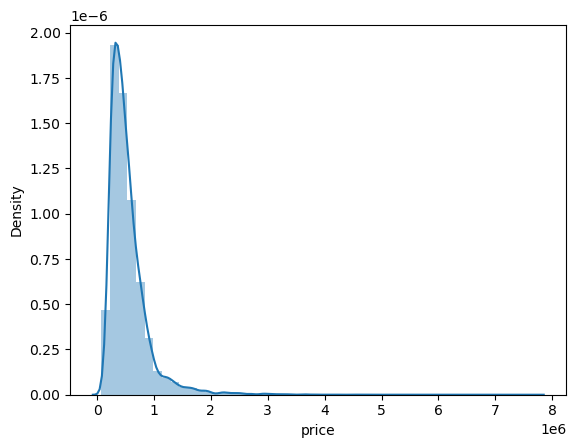

In [36]:
sns.distplot(df['price'],  label='price', norm_hist=True)  

C:\Users\Bruger\AppData\Local\Temp\ipykernel_6696\345522267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'],  label='sqft_living', norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

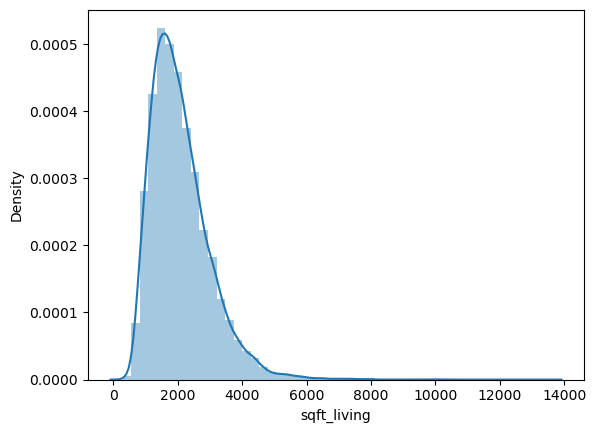

In [37]:
sns.distplot(df['sqft_living'],  label='sqft_living', norm_hist=True) 

<Axes: >

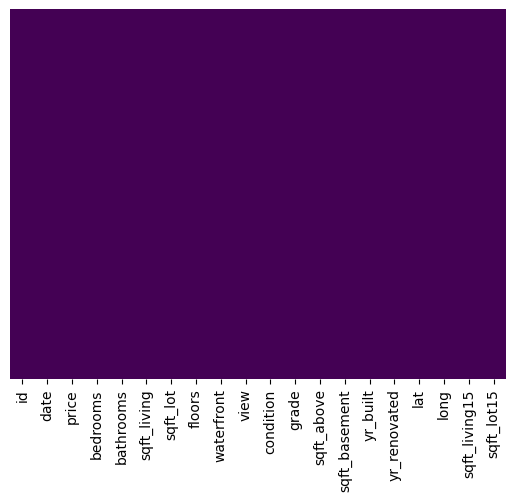

In [38]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

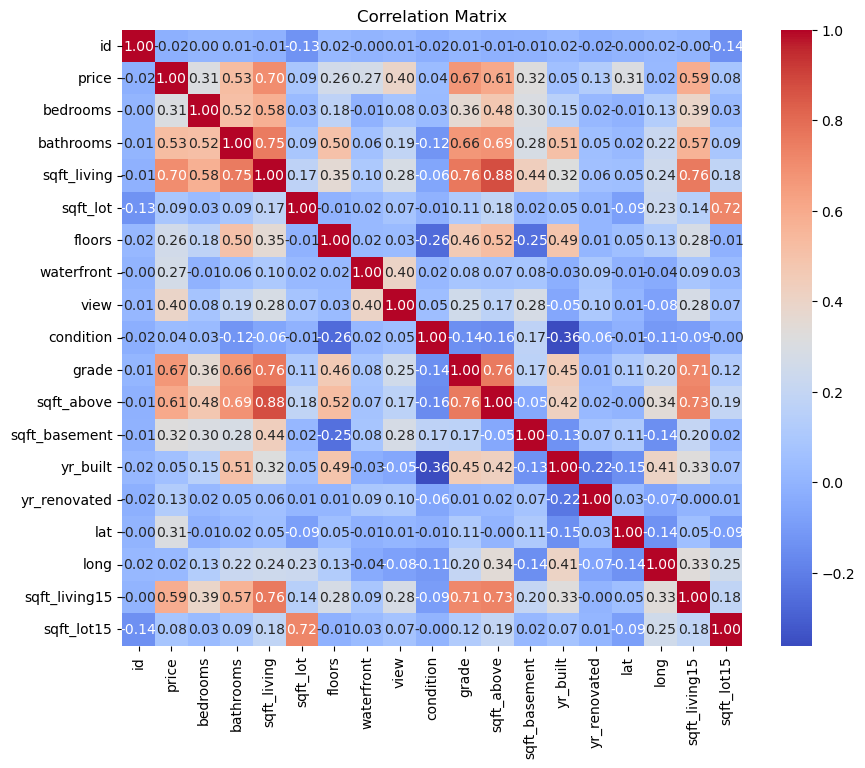

In [40]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: >

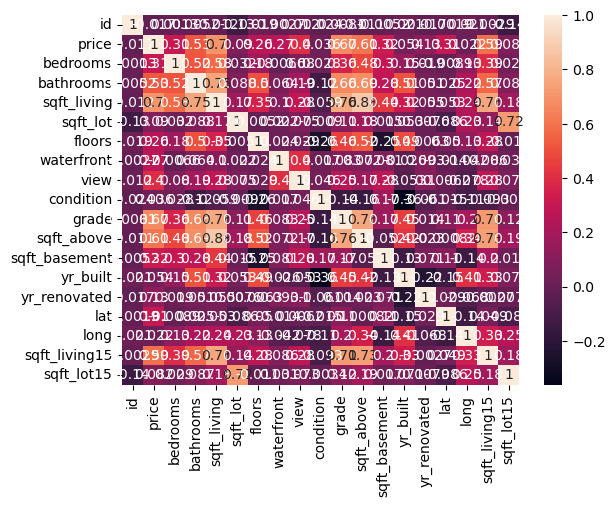

In [41]:
sns.heatmap(corr_matrix, annot=True)

In [42]:
X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

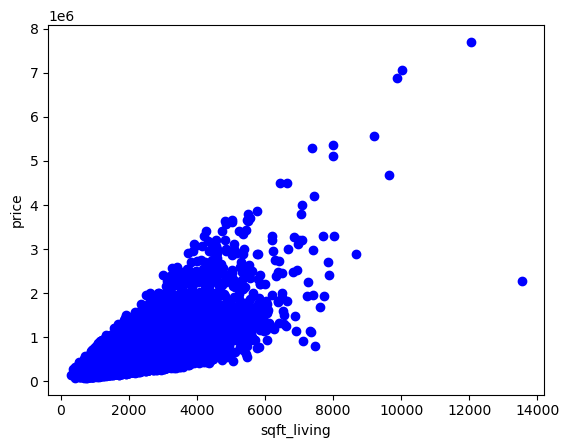

In [43]:
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(X, y, color='blue')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18371, 1)
(18371, 1)
(3242, 1)
(3242, 1)


In [48]:
y_test

array([[532500.],
       [410000.],
       [782500.],
       ...,
       [442000.],
       [326500.],
       [255000.]])

In [49]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [50]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [51]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [52]:
a

array([[277.88028773]])

In [54]:
b

array([-38891.11523714])

In [55]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 653030.80122013],
       [ 372371.71060895],
       [1003159.96376476],
       ...,
       [ 339026.07608089],
       [ 464072.20556111],
       [ 486302.62857982]])

In [56]:
y_test

array([[532500.],
       [410000.],
       [782500.],
       ...,
       [442000.],
       [326500.],
       [255000.]])

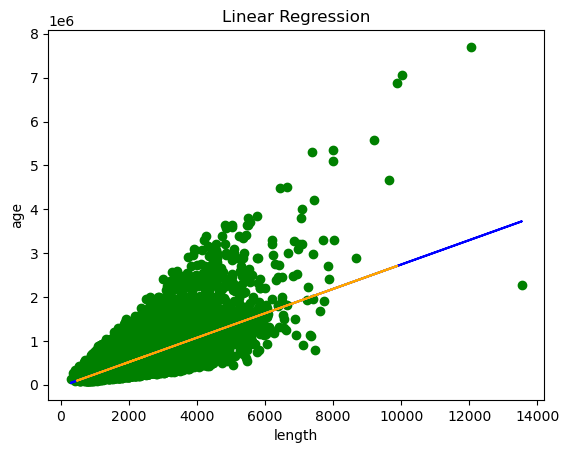

In [57]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()

In [58]:
R2 = myreg.score(X, y)
R2

0.49279845827805924

In [61]:
# Split X and y
X, y = df.sqft_living, df.price

In [62]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [63]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18371,)
(18371,)
(3242,)
(3242,)


In [64]:
# randomly selected
y_train

17801     427000.0
20764     380000.0
2285      225000.0
13350     681716.0
19376     440000.0
           ...    
10955     571000.0
17289    1350000.0
5192      650000.0
12172     437000.0
235      1025000.0
Name: price, Length: 18371, dtype: float64

In [65]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [66]:
model

array([   280.46173263, -43250.41440399])

In [67]:
a, b = model[0], model[1] 

In [68]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([   281.46072803, -45304.95082875])

In [69]:
a1, b1 = test[0], test[1]

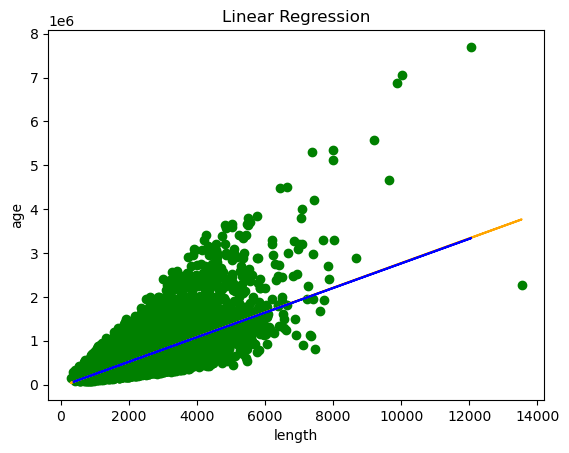

In [70]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('length')
plt.ylabel('age')
plt.show()

In [72]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[5569.73080028]])

In [73]:
price_predict = a*160 + b
price_predict

1623.4628162269437

In [74]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[-13604.00905336]])